__AVOCADO__

Avocado is a fruit consumed by people heavily in the United States. Though it is also available in India these days, the data given here is about the United States.

__STATEMENT__ This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

__IMPORTANT COLUMNS IN THE DATASET__:

Date - The date of the observation 

AveragePrice - the average price of a single avocado 

type - conventional or organic 

year - the year 

Region - the city or region of the observation 

Total Volume - Total number of avocados sold 

__GOAL__ - The goal is 
1. To predict the average price of avocado which is continuous
2. To integrate another Algorithm that will classify the region of the avocado.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
df=pd.read_csv("avocado.csv") #Reading csv file

In [3]:
#Viewing the data loaded
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

The contents of the above columns can be explained as follows-

__Unnamed: 0__ - Column used for indexing

__Date__ - The date of the observation

__AveragePrice__ - The average price of a single avocado

__Total Volume__ - Total number of avocados sold

__4046__ - Total number of avocados with PLU 4046 sold

__4225__ - Total number of avocados with PLU 4225 sold

__4770__ - Total number of avocados with PLU 4770 sold

__Total Bags__ - Total number of bags avocados are packed in

__Small Bags__ - Total number of Small bags used in packing avocados

__Large Bags__ - Total number of Large bags used in packing avocados

__XLarge Bags__ - Total number of XLarge bags used in packing avocados

__type__ - Tells the type of avocado if it is conventional or organic

__year__ - The year

__Region__ - The city or region of the observation

In [5]:
#Viewing the first 5 rows in the data
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
#Viewing the last 5 rows in the data
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


From the above data we can see that the column "Unnamed:0" is a representation of the index numbering, so there may not be any relevance of this column with respect to analysis and model training. Hence it can be dropped from the dataframe in further steps.

In [7]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


__Key Obseervations__:
1. The count of all the columns is same, which says there are no missing values in the dataset

2. The difference between 3rd quartile/75th Percentile and max is higher in the following columns
    - AveragePrice
    - Small Bags
    - Large Bags
    - XLarge Bags
    
This shows there are outliers present in these columns.
    
3. The mean is close to the median in following columns
    - Unnamed: 0
    - AveragePrice
    - 4225
    - year

These columns where the mean and median are close, the data is fairly balanced, or symmetric on each side
    
4. The mean is more than median (50th percentile) in following columns
    - Total Volume
    - 4770
    - Large Bags
    - XLarge Bags

This means the distribution of data is skewed to the right when the mean is more than the median
    
5. The median (50th percentile) is more than mean in following columns
    - 4046	
    - Total Bags
    - Small Bags

If the mean is much smaller than the median, the data are generally skewed left; a few smaller values bring the mean down.

In [8]:
#Checking the shape of the dataset
df.shape

(18249, 14)

The data has 18249 rows and 14 columns.

# Feature engineeering

In [9]:
#Droping Unnamed column
df.drop(df.columns[[0]],inplace=True, axis = 1)

In [10]:
#Checking if the column 'Unnamed:0' is removed
df.dtypes 

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Here we have Date, type and region columns as object type data. Year has integer type data, and rest all columns have float type data.

In [11]:
#checking the number of rows and columns in the dataset.
df.shape

(18249, 13)

After dropping the column 'Unnamed:0', the data has 18249 rows and 13 columns

# __Statistical Summary__

In [12]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


By looking at above info it is quite clear that the dataset has no null values.

In [13]:
#Checking unique values in each column
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Above are the unique value counts in each column of the dataset.

In [14]:
#Checking null values in the dataset
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

As analysed we donot have any null values in the dataset.

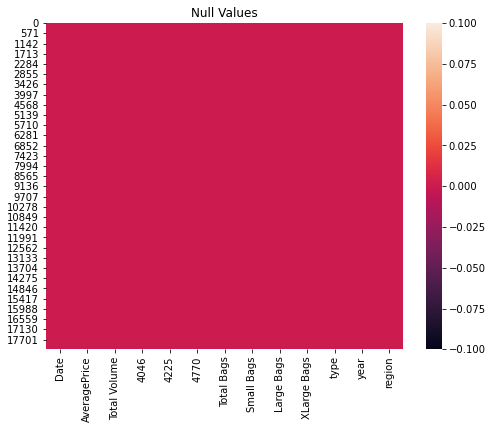

In [15]:
#Checking for null values using a heatmap
plt.figure(figsize=[8,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

After visualizing the dataset using heatmap, it is clear that there are no null values present.

In [16]:
#Checking for unique values in the target column
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

These are the unique values present in the target column of the dataset

# EDA (EXPLORATORY DATA ANALYSIS)

# Univariate Analysis

The dataset can be split into two types of columns .i.e.,Continuous columns and Categorical columns as follows

In [17]:
continuous_columns = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_columns = ['year', 'type', 'region']

__First let's Visualise and analyse the categorical columns__

In [18]:
#Checking the value counts of each region
df.region.value_counts()

CincinnatiDayton       338
LasVegas               338
NewOrleansMobile       338
Portland               338
Houston                338
Detroit                338
Philadelphia           338
California             338
Albany                 338
West                   338
GreatLakes             338
HartfordSpringfield    338
Spokane                338
SanDiego               338
Syracuse               338
BuffaloRochester       338
Jacksonville           338
SouthCarolina          338
LosAngeles             338
Sacramento             338
Pittsburgh             338
Nashville              338
Columbus               338
SouthCentral           338
RichmondNorfolk        338
Indianapolis           338
Roanoke                338
TotalUS                338
HarrisburgScranton     338
Seattle                338
Louisville             338
DallasFtWorth          338
Tampa                  338
Chicago                338
Plains                 338
Northeast              338
Boston                 338
M

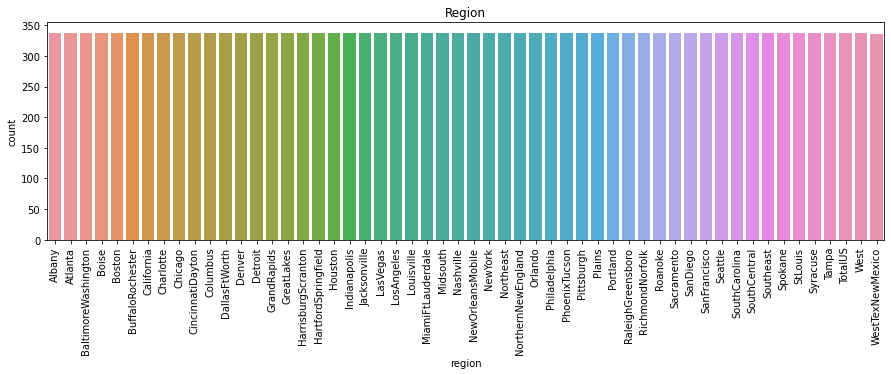

In [19]:
#Visualising the value counts of the Region column
plt.figure(figsize=(15,4))
sns.countplot(df["region"])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

The above data shows Region column has almost equal distributionbalanced data.

In [20]:
#Checking the value counts of types of avocado
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

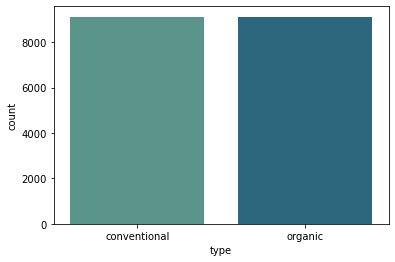

In [21]:
#Visualising the value counts of the type column
sns.countplot(x='type',data=df, palette="crest")
plt.show()

<AxesSubplot:xlabel='type'>

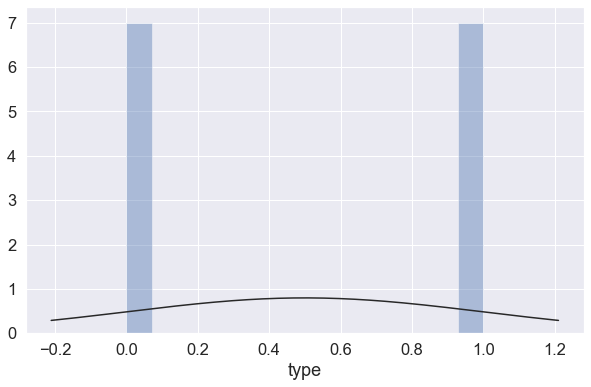

In [22]:
#checking the type of avacado in another plot
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(a=df['type'] == 'organic', kde=False, fit=norm)

In [23]:
organic=df['type'] == 'organic'
len(organic)

18249

In [24]:
conv=df['type'] == 'conventional'
len(conv)

18249

The type of avocado column has both conventional and organic almost equally distributed. This shows that the type of avocado column has balanced data.

In [25]:
#Checking the value counts of each year
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

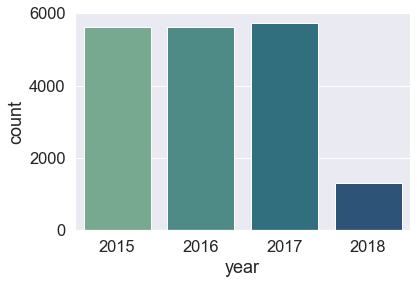

In [26]:
#Visualising the value counts of the year column
sns.countplot(x='year',data=df, palette="crest")
plt.show()

According to the above data, Year 2017 has the highest average price.

__Now let's Analyse the target variable which also comes under continuous columns but not included in it__

In [27]:
#Checking the value counts of target column
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64

Above are the value counts of target column.

In [28]:
#Checking for empty observations in the target column
df.loc[df['AveragePrice'] == " "]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


According to the above data we donot have any empty observations in the target column.

<AxesSubplot:title={'center':'Average Price Distribution Plot'}, xlabel='AveragePrice', ylabel='Density'>

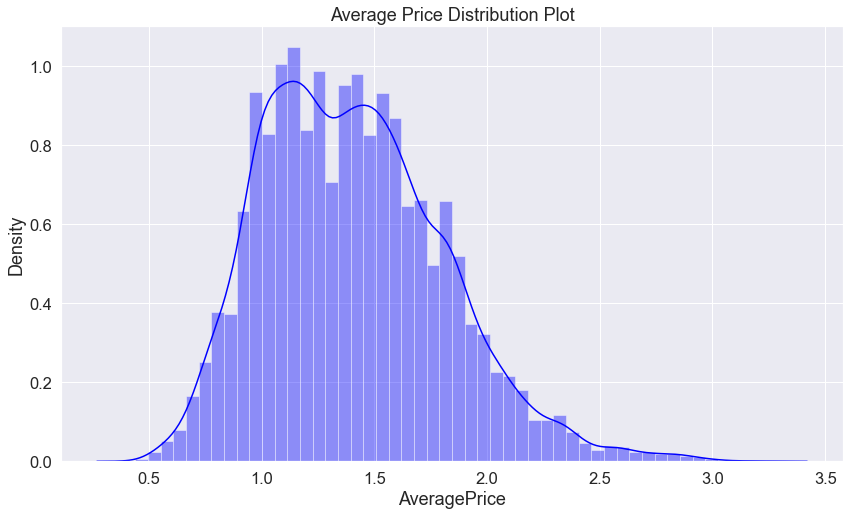

In [29]:
#Visualising the value counts of the target column
plt.figure(figsize=(14,8))

plt.title('Average Price Distribution Plot')
sns.distplot(df['AveragePrice'],color='Blue')

The above graph shows that though the average price lies between 0.5 and 3.0, it is predominant between the inteval 1.0 and 2.0. This says the data in this column is not distributed equally. By which we can say that the target column has imbalance in the data.

<AxesSubplot:xlabel='AveragePrice'>

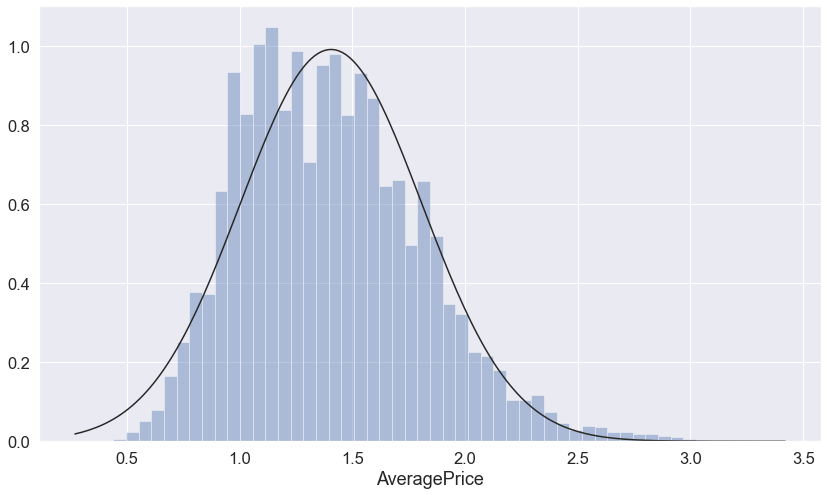

In [30]:
#Distribution of the Average price feature:
sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(14, 8))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

As we can notice, the Average price column has a bit of skewness. It is Skewed to the right. It also means there were high fluctuations in price

__Analysing the remaining continuous columns__

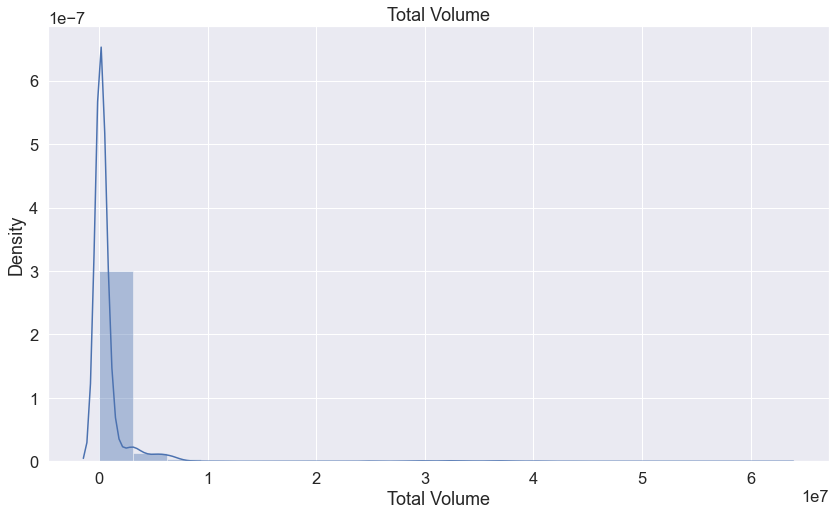

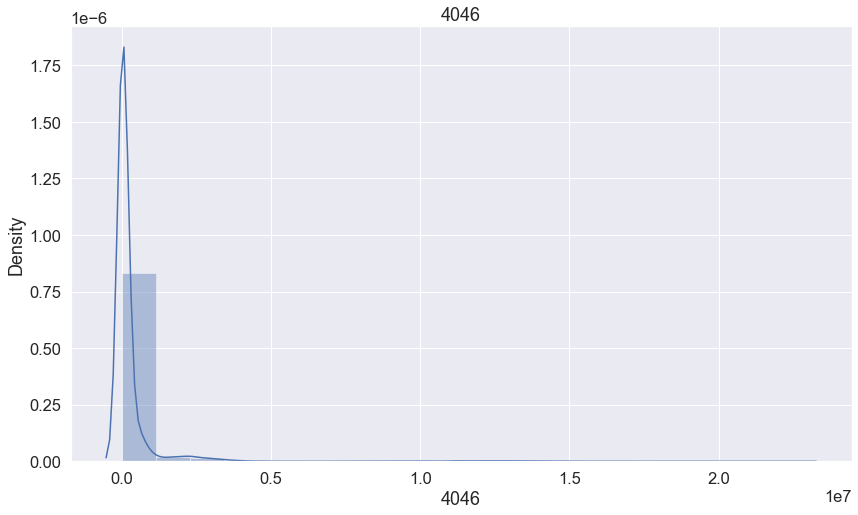

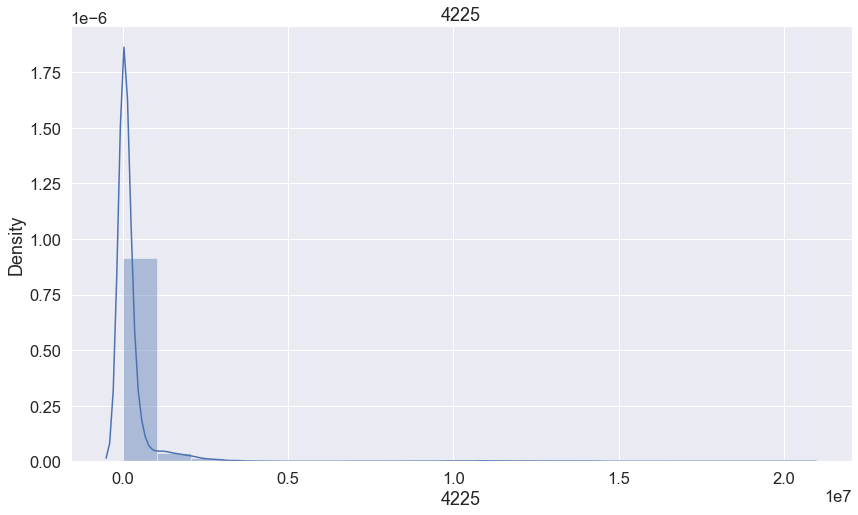

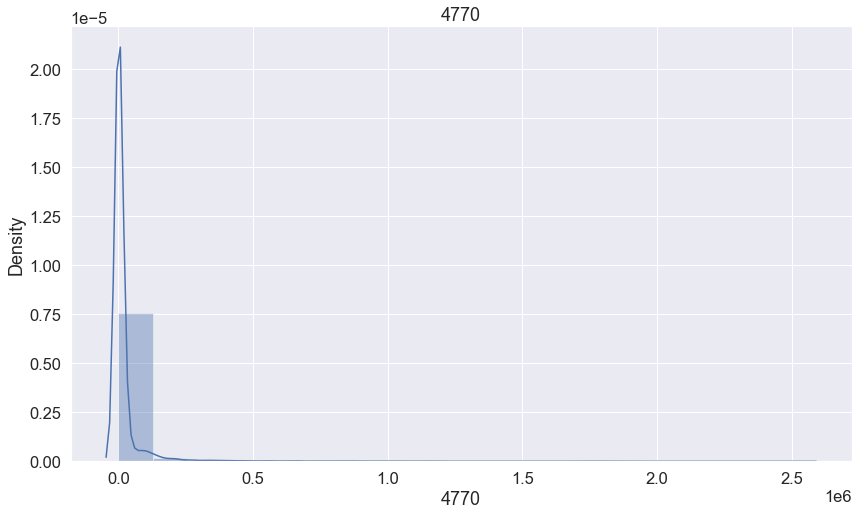

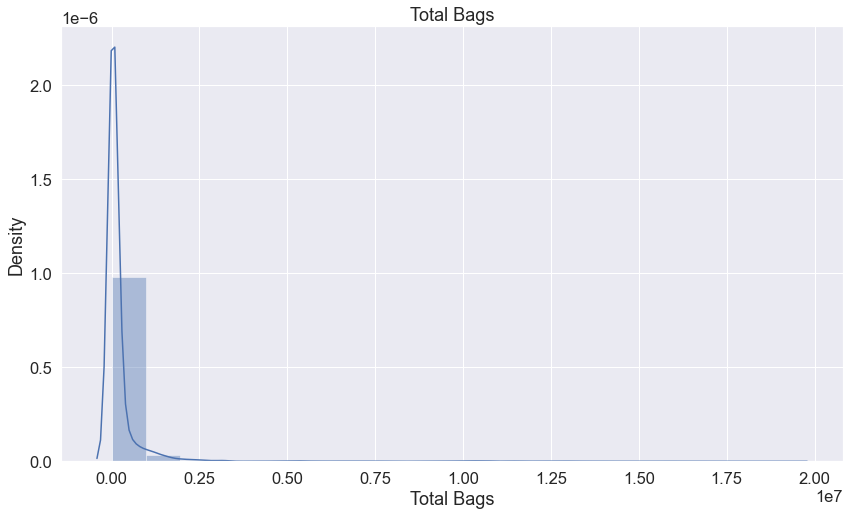

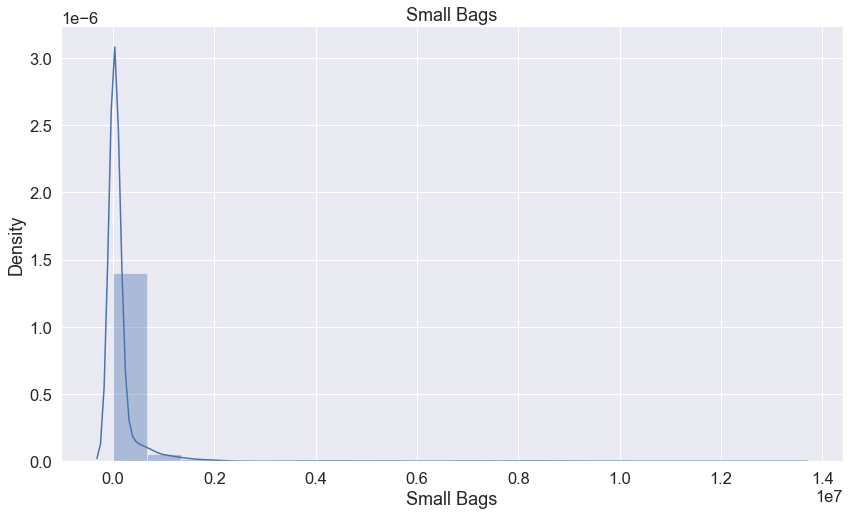

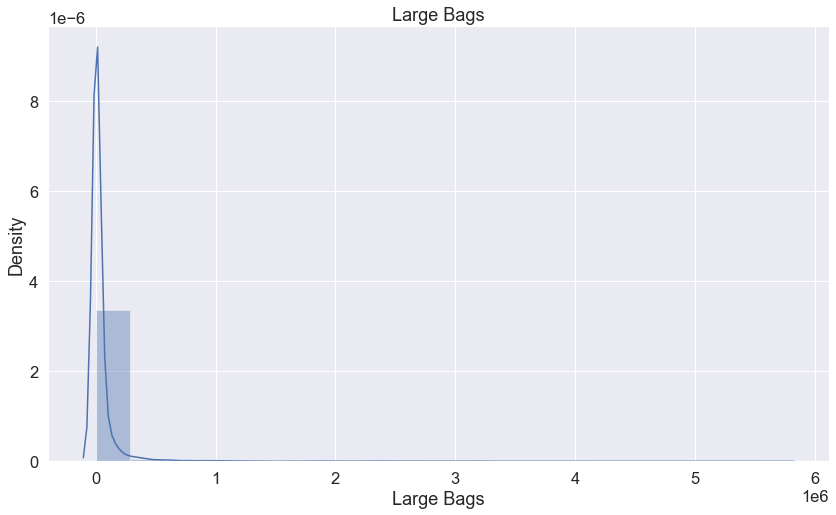

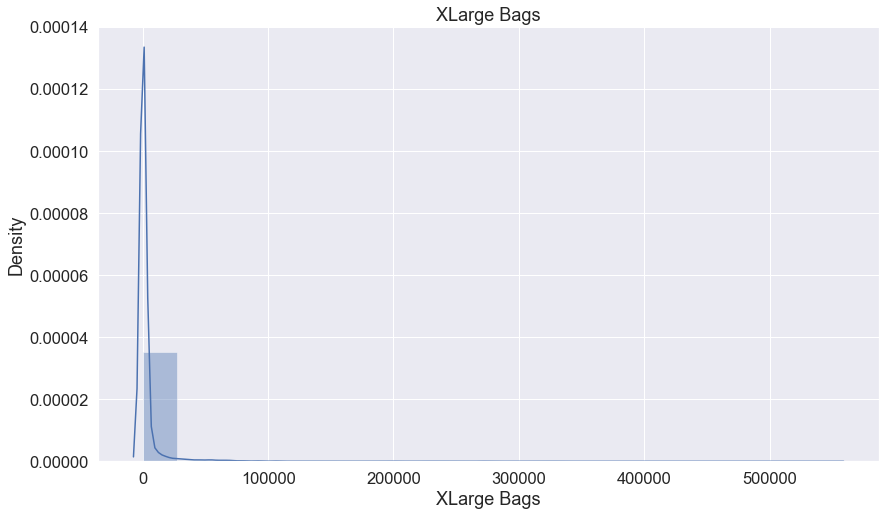

In [31]:
#plotting distplot to check for Normal Distribution
for i in df[continuous_columns]:              
    plt.figure(figsize = (14, 8))
    sns.distplot(df[i], bins = 20)
    plt.title(i)
    plt.show()

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

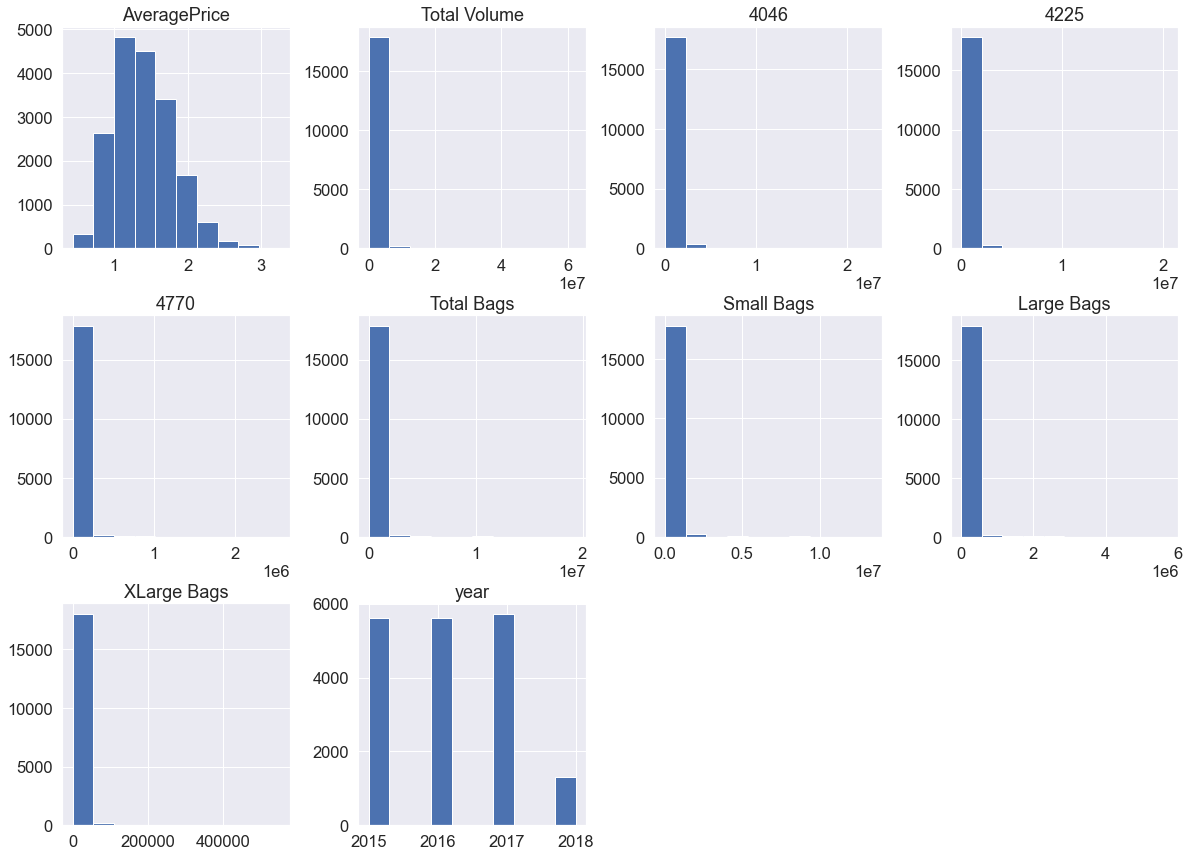

In [32]:
#plotting histogram for univariate analysis and checking the Normal Distribution
df.hist(figsize=(20,20), grid = True, layout = (4,4))

This shows all the above continuous columns are skewed. Whereas the Average Price is the only column slightly skewed and near normal

# Bivariate Analysis

In [33]:
#Checking the mean of Average Price of the avocado year wise
df.groupby('year')['AveragePrice'].mean() 

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

<AxesSubplot:title={'center':'AveragePrice v/s year'}, xlabel='year', ylabel='AveragePrice'>

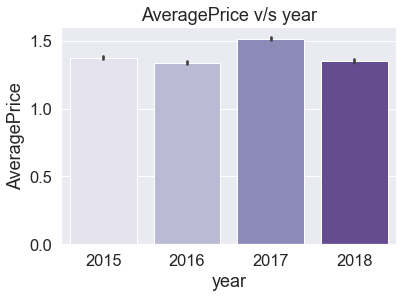

In [34]:
#Visualizing Year wise Average Price of the avocado
plt.title('AveragePrice v/s year')
sns.barplot(x='year',y='AveragePrice',data=df, palette= 'Purples')

This shows that the year 2017 has higher average selling price for avocado than rest of the years

In [35]:
#checking the mean of volume of avacado sold per year
df.groupby('year')['Total Volume'].mean()

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64

In [36]:
#Checking total sales by year 
df.groupby('year')['Total Volume'].count()

year
2015    5615
2016    5616
2017    5722
2018    1296
Name: Total Volume, dtype: int64

<AxesSubplot:title={'center':'Total Avocados sold v/s year'}, xlabel='year', ylabel='Total Volume'>

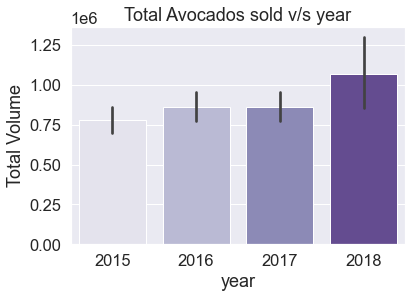

In [37]:
#Visualizing Year wise Total sale of avocado
plt.title('Total Avocados sold v/s year')
sns.barplot(x='year',y='Total Volume',data=df,palette= 'Purples' )

This shows that the Sales are trending in an increasing order since 2015 and the year 2018 has had highest sale than other years

In [38]:
#Checking the sale of both types of avacado in each year
df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

<AxesSubplot:xlabel='year', ylabel='count'>

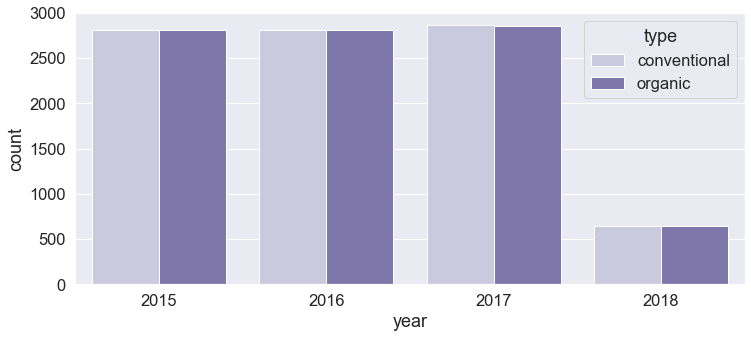

In [39]:
#Visualizing Year wise the number of avocado sold depending upon the type of Avocado
plt.figure(figsize=(12,5))
sns.countplot(x='year', hue='type', data= df, palette= 'Purples')

__Observations:__
    
- The 'Conventional' and 'Organic' types were sold equally from 2015-2018

- There is an increasing trend of sales from 2015 to 2017 and then, a huge fall in 2018

- The year 2017 had highest sales

- The year 2018 had a drastic drop, it had lowest sales     

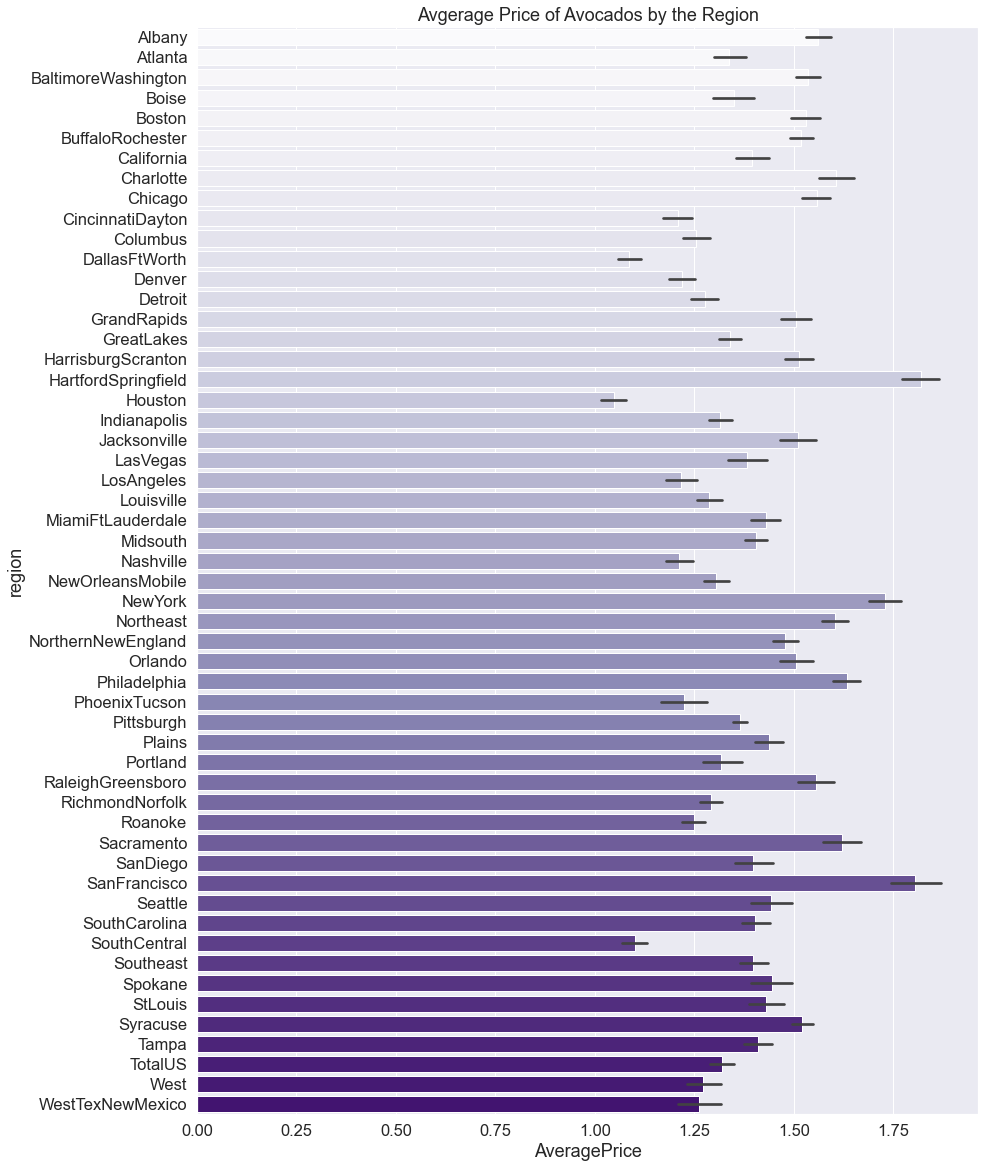

In [40]:
#Checking the Average price region wise
plt.figure(figsize=(14,20))
plt.title("Avgerage Price of Avocados by the Region")
sns.barplot(x="AveragePrice",y="region",data=df,  palette= 'Purples')
plt.show()

__Observations :__
- HartfordSpringfield,SanFrancisco and NewYork has the highest average price
- Houston, Southcarolina,DallasFtWorth has the lowest average price

In [41]:
#Checking the mean average price of each type of avocado
df.groupby('type')['AveragePrice'].mean() 

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

The mean average of organic avocado is much higher than the conventional avocado.

In [42]:
#checking the mean average price at each year of organic avacado

organic = df[df['type'] == 'organic']
organic.groupby('year')['AveragePrice'].mean()

year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: AveragePrice, dtype: float64

The Average Price distribution shows that for most cases price of avocado is between 1.5 and 1.74.

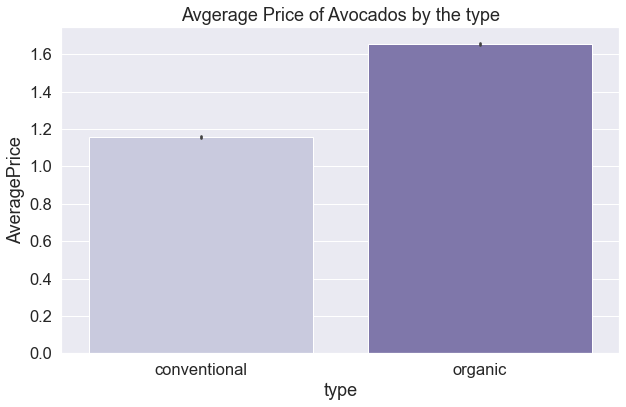

In [43]:
#Visualizing Avgerage Price of Avocados by the type
plt.figure(figsize=(10,6))
plt.title("Avgerage Price of Avocados by the type")
sns.barplot(x="type",y="AveragePrice",data=df, palette= 'Purples')
plt.show()

__Observations :__
- Average Price of Organic Avocados between 2015-2018 is higher than the conentional type

Let's look at average price throughout the date:

Text(0.5, 1.0, 'Average Price')

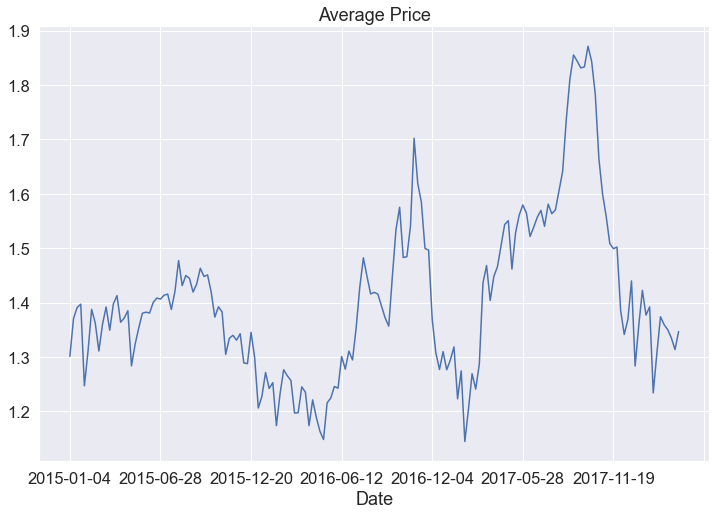

In [44]:
#Plotting the Average Price of avocado throughout the Dates 
byDate=df.groupby('Date').mean()
plt.figure(figsize=(12,8))
byDate['AveragePrice'].plot()
plt.title('Average Price')

This shows highest average price of avocado between the mid and end of the year 2017

In [45]:
#Extract the Month from DOB into separate column in order to analize the data by month
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


Text(0.5, 1.0, 'Average_Price')

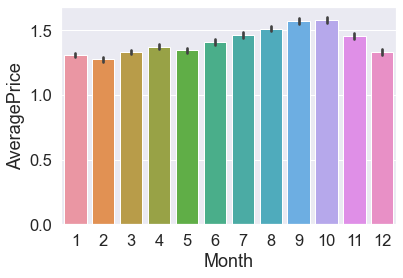

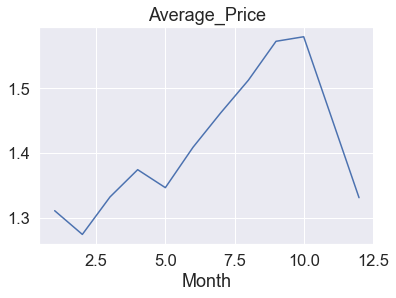

In [46]:
#Checking average price by month
sns.barplot(x = "Month" , y = "AveragePrice" ,data=df )
month=df.groupby('Month').mean()
plt.figure(figsize=(6,4))
month['AveragePrice'].plot()
plt.title('Average_Price')

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

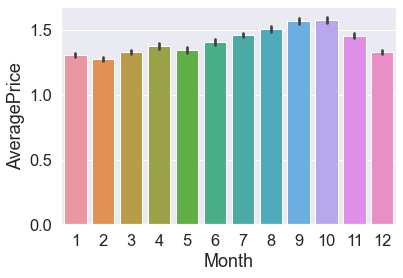

In [47]:
#Checking average price by month in a barplot
sns.barplot(x = "Month" , y = "AveragePrice" ,data=df )

__Obseravtions:__
- The Average price has seen slight increase from 1st to 10th month and has a decrease in the last two months
- September and October months has the highest average price

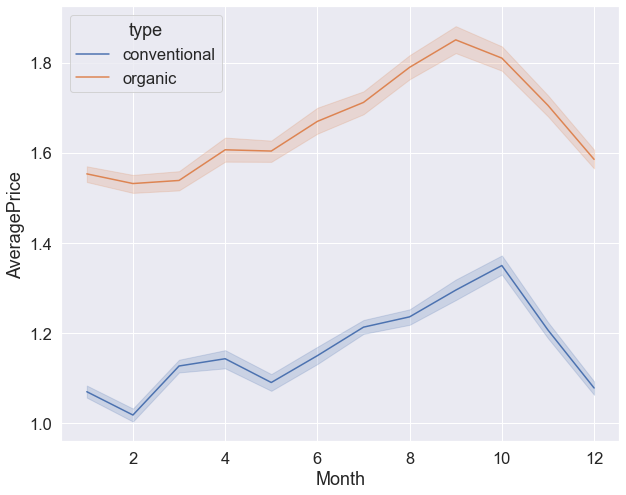

In [48]:
#plotting Average price over the months by Conventional and Organic Type of avocado:

plt.figure(figsize=(10,8))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

Above graph shows that 
- There is Gradual increase between month 5 and 10 
- The average price is highest between month 8-10 for both types of avacado
- Average price of Organic avacado is higher than the conventional type

Text(0.5, 1.0, 'Average of Total Volume According to Region')

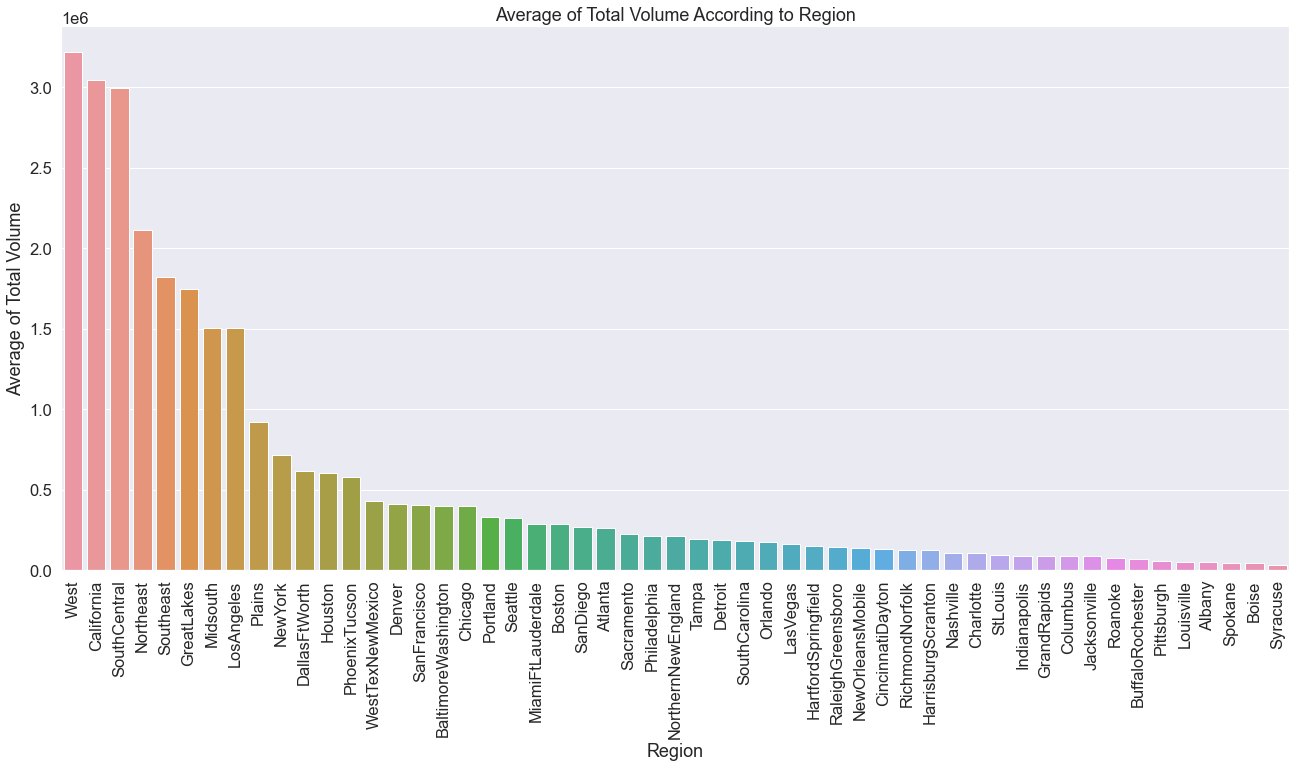

In [49]:
#checking for TOP 5 regions where Average consumption of avocado is very high:

filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

The average of total volume by Region shows that West, California, SouthCentral, Northeast, Southeast and GreatLakes are the Regions with highest consumption of avocado .

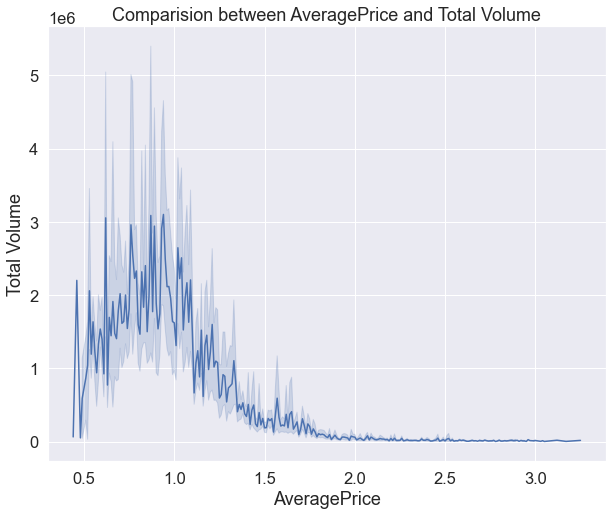

In [50]:
#Comparision between features using line plot
plt.figure(figsize=[10,8])
plt.title('Comparision between AveragePrice and Total Volume')
sns.lineplot(df['AveragePrice'],df['Total Volume']);

The concentration of the average price between 0.5 - 1.5 and the Total Volume between 0 - 3 is higher.

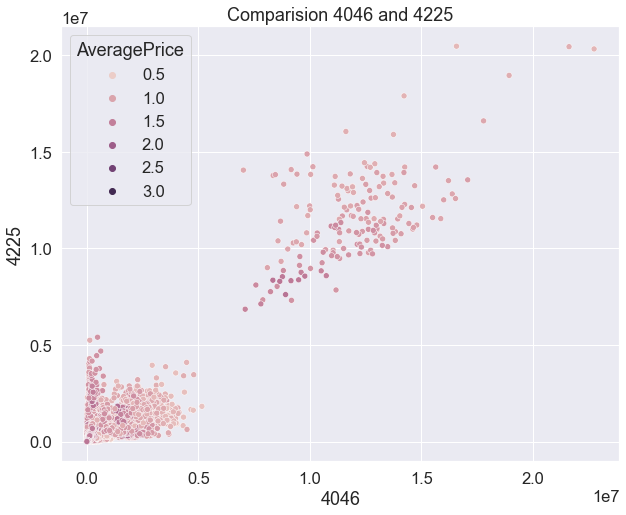

In [51]:
#Comparision between features using scatter plot
plt.figure(figsize=[10,8])
plt.title('Comparision 4046 and 4225')
sns.scatterplot(df['4046'],df['4225'],hue=df["AveragePrice"]);

It is denseer near 0 - 0.5 for both 4046 and 4225 PLU, which means these both has lesser AveragePrice count.

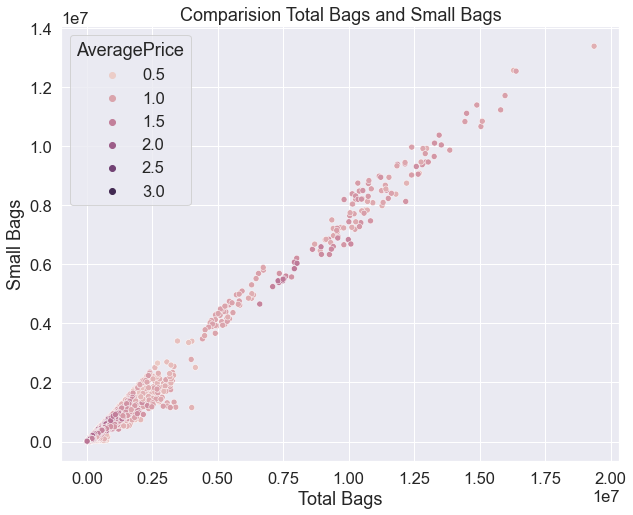

In [52]:
#Comparision between features using scatter plot
plt.figure(figsize=[10,8])
plt.title('Comparision Total Bags and Small Bags')
sns.scatterplot(df['Total Bags'],df['Small Bags'],hue=df["AveragePrice"]);

The distribution of Total bags and Small bags is linear as seen in the above graph

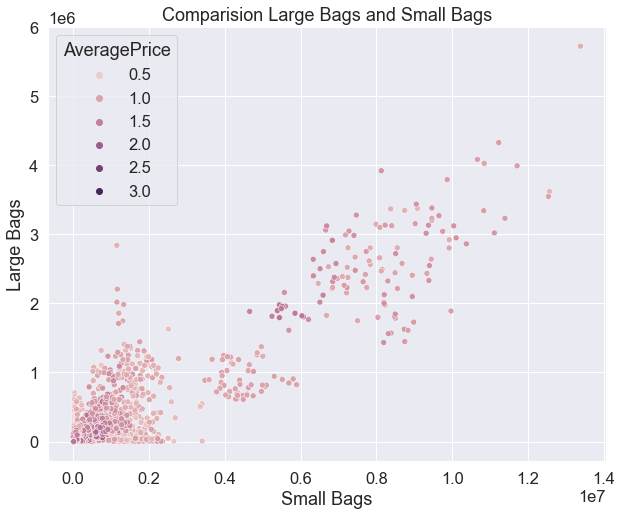

In [53]:
#Comparision between features using scatter plot
plt.figure(figsize=[10, 8])
plt.title('Comparision Large Bags and Small Bags')
sns.scatterplot(df['Small Bags'],df['Large Bags'],hue=df["AveragePrice"]);

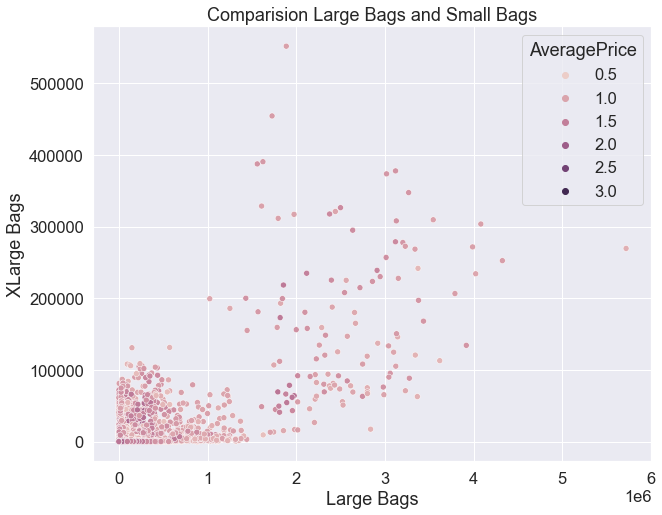

In [54]:
#Comparision between features using scatter plot
plt.figure(figsize=[10, 8])
plt.title('Comparision Large Bags and Small Bags')
sns.scatterplot(df['Large Bags'],df['XLarge Bags'],hue=df["AveragePrice"]);

Extreme outliers can be observed from the above graphs

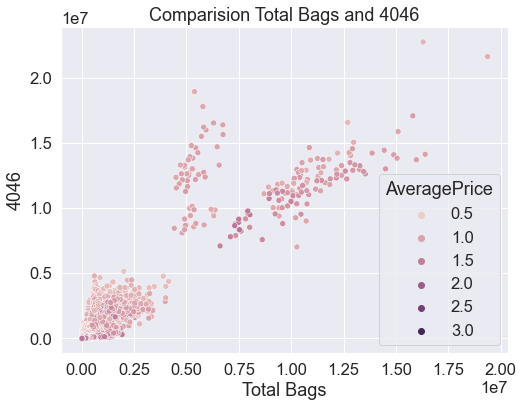

In [55]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Total Bags and 4046')
sns.scatterplot(df['Total Bags'],df['4046'],hue=df["AveragePrice"]);

Above plot shows that the points are denser with lesser Total Bags and 4046 PLU.

# Multivariate Analysis:

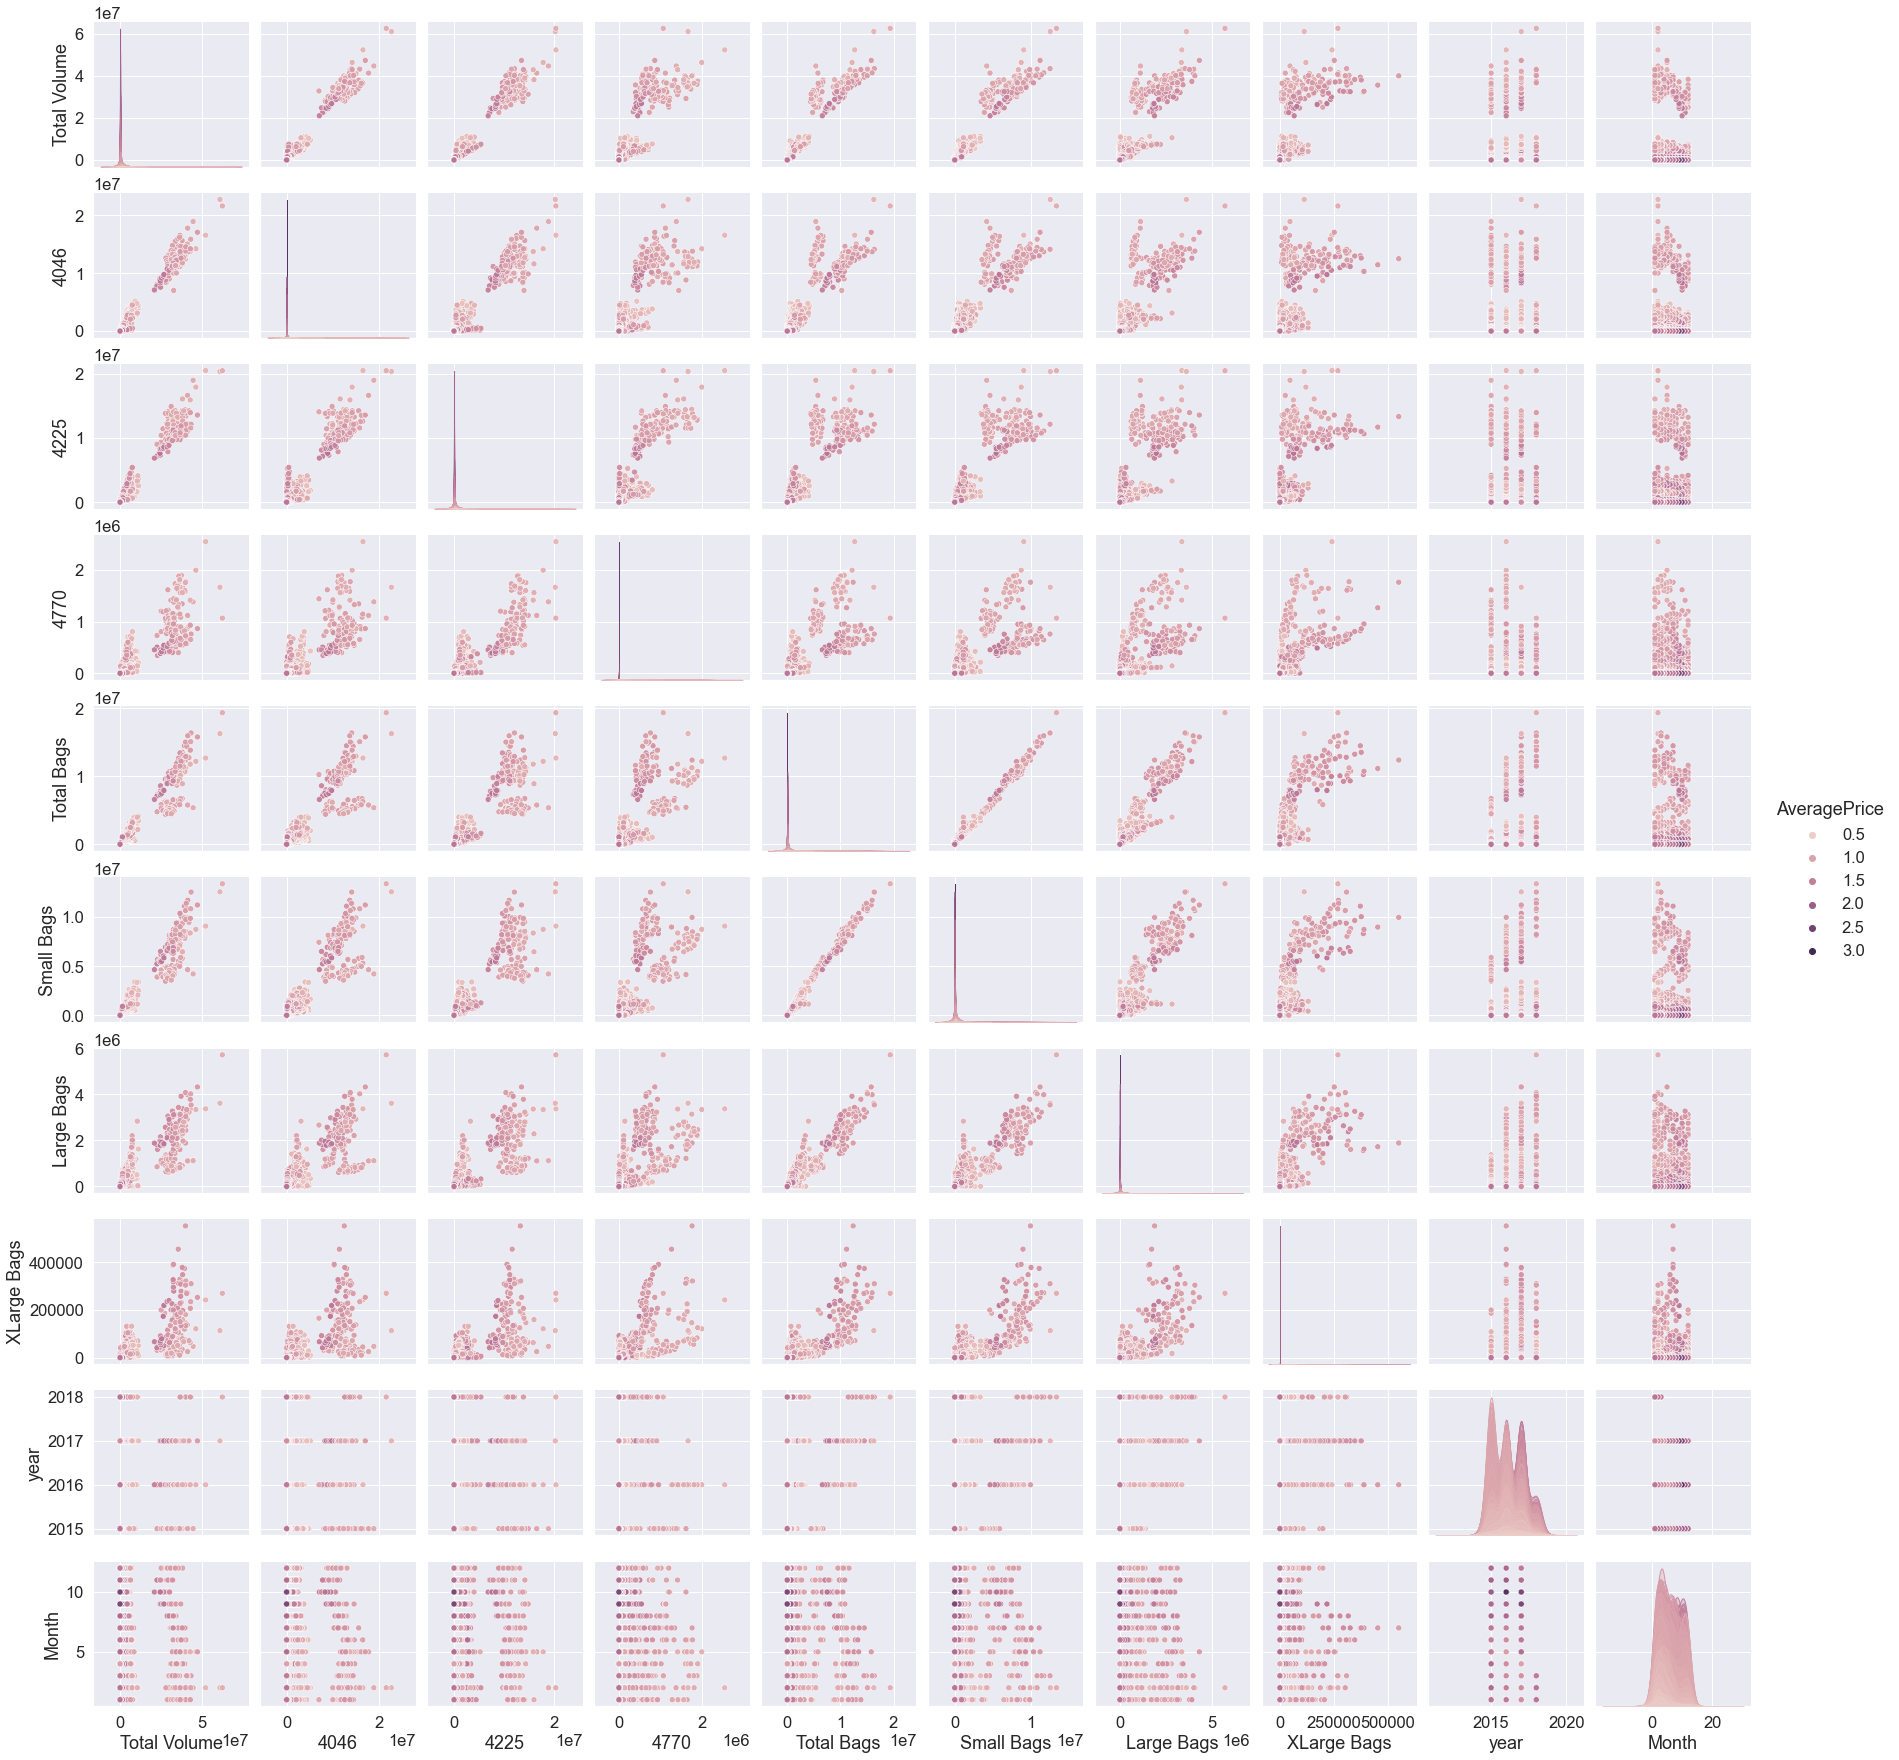

In [56]:
#Using pair plot for multivariate analysis
sns.pairplot(df,hue="AveragePrice")

Most of the pair plots are linear and outliers are observed in some of the features.

# Data Cleaning:

<AxesSubplot:>

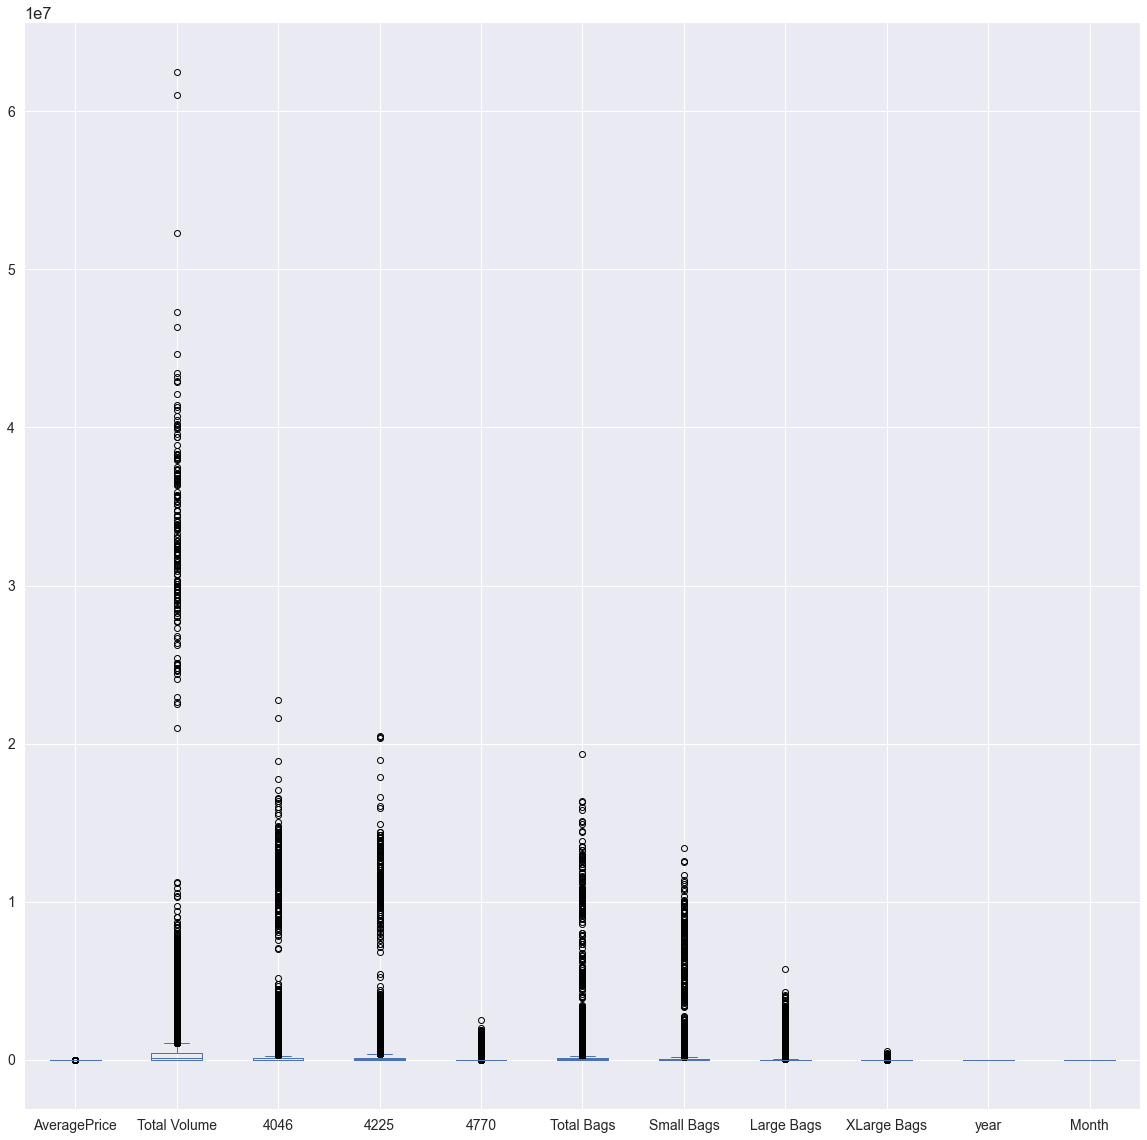

In [57]:
#Checking for outliers
df.plot(kind='box',fontsize=14,figsize=(20,20),color='b')

__Observations:__

- The columns year,month,day are categorical so we need not check for outliers in these columns. 
- All the other columns except year, month and day have huge number of outliers 
- There are outliers in the target column as well but removing them leads to manipulation of the data in the target column.


# Removing Outliers:

## I) Zscore method:

In [58]:
#Features that are having outliers
features=df[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

In [59]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


Outliers have been removed using zscore method.

In [60]:
#Checking the shape of new dataset
df_new.shape

(17782, 14)

In [61]:
#Checking shape of old dataset
df.shape

(18249, 14)

After removing the outliers, the new dataset has 17782 rows and 14 columns where as the old dataset has 18249 rows and 14 columns.

In [62]:
#Checking dataloss
Dataloss = (((18249-17782)/18249)*100)
Dataloss

2.55904433119623

Using Zscore method to remove the outliers there is a loss of 2.56% data, which is less than 10%. So we can also check for the viability of IQR method here.

## II) IQR method:

In [63]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Outliers have been removed using IQR method.

In [64]:
#Checking shape of new dataset
df_1.shape

(11747, 14)

In [65]:
#Checking shape of old dataset
df.shape

(18249, 14)

After removing the outliers using IQR method there are 11747 rows and 14 columns where as the old dataset has 18249 rows and 14 columns.

In [66]:
#Checking dataloss
Dataloss = (((18249-11747)/18249)*100)
Dataloss

35.62934955340019

There is huge loss of data using IQR method. So we can use Zscore method to remove outliers with less loss of data.

# Checking skewness:

In [67]:
#Checking for skewness
df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
dtype: float64

There is skewness in almost all columns except the categorical columns like year, month and Day

# Removing Skewness:

In [68]:
#Listing all the columns with skewness and assigning to a variable 'skewed'
skewed=["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]

In [69]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

__Using yeo-johnson to remove skewness__

In [70]:
#Removing skewness using yeo-johnson
df_new[skewed] = scaler.fit_transform(df_new[skewed].values)

In [71]:
#Removing skewness in H using log1p
df_new["XLarge Bags"]=np.log1p(df_new["XLarge Bags"])

In [72]:
#Checking skewness after removing skewness
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
dtype: float64

This shows that most of the skewness is removed from the dataset

# Label Encoding

Converting the categorical data into numercial data in order to normalize and check the correlations

In [73]:
#Listing the categorical columns to be label encoded and assigning them to a variable 'col'
col = ["type","region"]

In [74]:
#Using Label encoder to encode categorical data.
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[col]= df_new[col].apply(LE.fit_transform)

In [75]:
df_new[col].head()

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


This shows that the data is no more categorical and is converted to numerical format using label encoding

In [76]:
df_new.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,0,2015,0,12
1,2015-12-20,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,0,2015,0,12
2,2015-12-13,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,0,2015,0,12
3,2015-12-06,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,0,2015,0,12
4,2015-11-29,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,0,2015,0,11


Now all the data in the dataset is in the numerical form

# GOAL - 1


## To predict the average price of avocado which is continuous

# Correlation

In [77]:
#Assigning correlation to a variable 'cor'
cor=df_new.corr()

In [78]:
#Checking Correlation
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.010428,0.157900
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,0.065709,-0.026332
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,0.159390,-0.025919
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,0.032273,-0.024708
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,0.037805,-0.017377
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,0.065996,-0.014571
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,0.051985,-0.010260
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,0.086573,-0.016942
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,-0.017598,0.020885
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,0.021970,-0.005044


Above chart shows the correlations of all the pairs of features.we can use heatmap to get better understanding on the correlation of features.

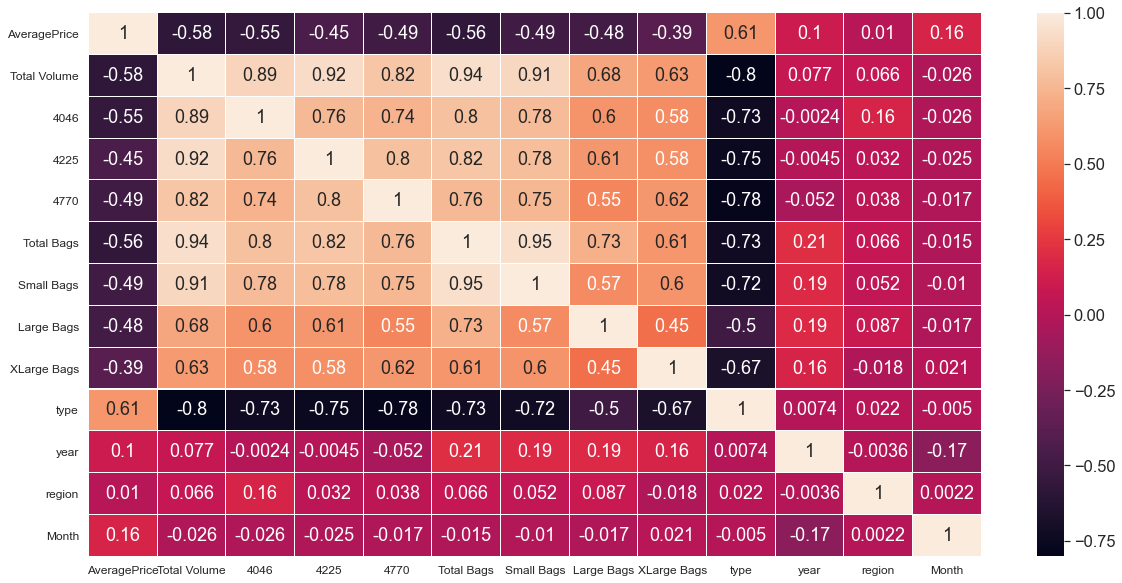

In [79]:
#Plotting heatmap to check the correlation
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),linewidths=.1,annot=True)
plt.yticks(rotation=0,fontsize=12);
plt.xticks(rotation=0,fontsize=12);

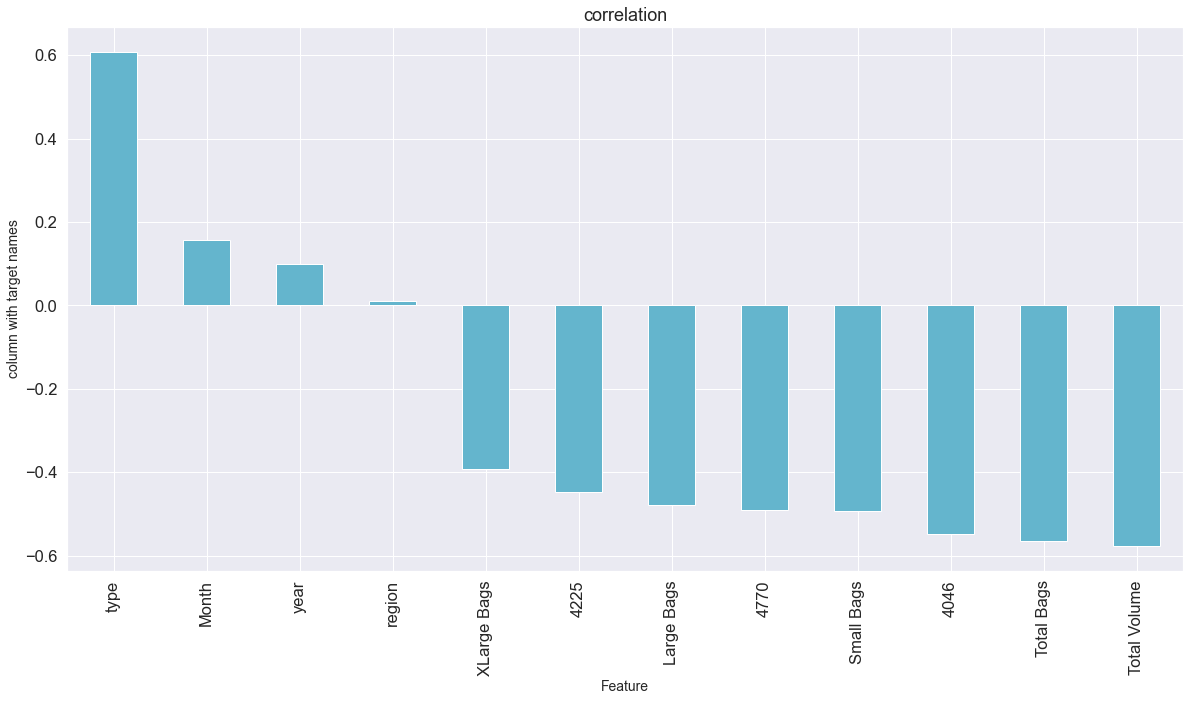

In [80]:
#Plotting bar plot to get better insights on target variable correlation with other columns .
plt.figure(figsize=(20,10))
df_new.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

__Observations:__
- Total Bags and Small Bags, Total Volume and Small Bags, Total Volume and Total Bags, Total Volume and 4225 are highly correlated with each other.
- The target variable 'Average Price' is negatively correlated with all the continuous data columns like 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'
- The target variable 'Average Price' is positively correlated with all the categorical data columns like 'Date', 'type', 'year', 'region', 'Month'
-  Type is highly negative correlated with all the columns except the target variable 'AveragePrice'
- 'Total Volume' is highly negatively correlated with target variable 'AveragePrice'

__Inferences:__
The columns that have very less correlation with the target variable like Date and region can be dropped

In [81]:
#Droping Date and region columns
df_new = df_new.drop(["Date"],axis=1)
df_new = df_new.drop(["region"],axis=1)

# Preprocessing:

In [82]:
#Splitting the data for model training and Assigning variables for the further procedure
x = df_new.drop("AveragePrice",axis=1)
y = df_new["AveragePrice"]

# Scaling the data using Standard Scaler:

In [83]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [84]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

The data has been scaled using standard scaler.

# Using VIF(Variance Inflation Factor) to remove multicolinearity:

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,51.806476,Total Volume
1,6.808776,4046
2,11.158951,4225
3,3.951861,4770
4,34.441003,Total Bags
5,16.630696,Small Bags
6,3.462408,Large Bags
7,2.065369,XLarge Bags
8,3.720176,type
9,1.386160,year


Since there can be seen high VIF for Total volume, the column shall be dropped and check for VIF again.

In [86]:
#Droping Total Volume column
X = X.drop(["Total Volume"],axis=1)

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,3.546068,4046
1,4.272321,4225
2,3.936681,4770
3,24.479948,Total Bags
4,16.630524,Small Bags
5,3.419283,Large Bags
6,2.053729,XLarge Bags
7,3.487456,type
8,1.383630,year
9,1.051817,Month


After dropping Total volume, Total bags can be seen having high VIF,hence dropping that column.

In [88]:
#Droping Total Bags column
X = X.drop(["Total Bags"],axis=1)

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,3.527072,4046
1,4.127765,4225
2,3.936426,4770
3,4.098464,Small Bags
4,1.864199,Large Bags
5,2.053482,XLarge Bags
6,3.484298,type
7,1.359151,year
8,1.051183,Month


This shows the multicolinearity issue has been solved.So we can proceed with model building.

# Finding Best Random State and Accuracy:

In [90]:
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = KNN()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8666077410567096  on Random_state  3


The best accuracy score is 0.8666077410567096 on Random_state  3

# Regression Algorithms:

In [91]:
#importing necessary libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

In [92]:
# Regression Model Function

def reg(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)
    
    # Training the model
    model.fit(X_train, y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

# I) Linear Regression:

In [93]:
model=LinearRegression()
reg(model, X, y)

RMSE Score is: 0.28350139910626304
R2 Score is: 50.906624612785514
Cross Validation Score: 9.294620763838497
R2 Score - Cross Validation Score is 41.61200384894702


# II) Ridge Regression

In [94]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, y)

RMSE Score is: 0.2836295816458934
R2 Score is: 50.86222034390093
Cross Validation Score: 9.660870774886824
R2 Score - Cross Validation Score is 41.201349569014106


# III) Lasso Regression

In [95]:
# Lasso Regression

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, y)

RMSE Score is: 0.40461736494718586
R2 Score is: -0.0003487564532056453
Cross Validation Score: -120.04309324076277
R2 Score - Cross Validation Score is 120.04274448430957


# IV) Support Vector Regression

In [96]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, y)

RMSE Score is: 0.23862987222306178
R2 Score is: 65.21739561502838
Cross Validation Score: -13.950067514535789
R2 Score - Cross Validation Score is 79.16746312956417


# V) Decision Tree Regressor

In [97]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, y)

RMSE Score is: 0.3251322562703967
R2 Score is: 35.42973103164837
Cross Validation Score: -192.06005434494494
R2 Score - Cross Validation Score is 227.48978537659332


# VI) KNN:

In [98]:
# K Nearest Neighbors Regressor

KNeighborsRegressor()
reg(model, X, y)

RMSE Score is: 0.3251322562703967
R2 Score is: 35.42973103164837
Cross Validation Score: -192.06005434494494
R2 Score - Cross Validation Score is 227.48978537659332


# VII) RandomForestRegressor:

In [99]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, y)

RMSE Score is: 0.30623501960432137
R2 Score is: 42.71747069793261
Cross Validation Score: 1.893872317543279
R2 Score - Cross Validation Score is 40.823598380389335


# VIII) SGD:

In [100]:
#SGD

model=SGDRegressor()
reg(model, X, y)

RMSE Score is: 0.28358006312876527
R2 Score is: 50.87937664728934
Cross Validation Score: 10.330200450101144
R2 Score - Cross Validation Score is 40.549176197188196


# IX) Gradient Boosting:

In [101]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, y)

RMSE Score is: 0.3177861235463846
R2 Score is: 38.314606641128705
Cross Validation Score: -34.89252570821901
R2 Score - Cross Validation Score is 73.20713234934772


# X) Ada Boost Regressor

In [102]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, y)

RMSE Score is: 0.28435886598716514
R2 Score is: 50.60920382795484
Cross Validation Score: -8.04460523600288
R2 Score - Cross Validation Score is 58.65380906395772


# XI) Extra Trees Regressor

In [103]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, y)

RMSE Score is: 0.13574035918101307
R2 Score is: 88.74538954350311
Cross Validation Score: 29.916957749499883
R2 Score - Cross Validation Score is 58.82843179400322


# XII)  XGB Regressor

In [104]:
# XGB Regressor

model=XGBRegressor()
reg(model, X, y)

RMSE Score is: 0.15700426006606208
R2 Score is: 84.94310739676112
Cross Validation Score: 30.72797448113289
R2 Score - Cross Validation Score is 54.21513291562823


Though many other models have less difference between the r2 score and cross validation score, K Nearest Neighbors and XGB Regressor has the better accuracy score and lesser difference between R2 score and cross validation score. let's proceed with one of the KNN and XGB Regressor models

# Hyper Parameter tuning:

In [105]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [106]:
#Giving KNN parameters.
parameter = {'n_neighbors':[1,2,3,4],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute'],
            'n_jobs':[10,20,30,40]}

In [107]:
GCV=GridSearchCV(KNN(),parameter,cv=5)

In [108]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [10, 20, 30, 40],
                         'n_neighbors': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [109]:
#Tuning the model with GCV
GCV.best_params_

{'algorithm': 'brute', 'n_jobs': 10, 'n_neighbors': 3, 'weights': 'distance'}

In [110]:
#Getting the Final model with the best parameters.
Final_mod=KNN(algorithm='brute',n_jobs=10,n_neighbors=3,weights='distance')
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 87.3601547366946
mean_squared_error: 0.020305408930555366
mean_absolute_error: 0.0967829585752124
RMSE value: 0.14249704884858272


This is the final model after tuning,where r2_score is 87.36

# Saving the model:

In [111]:
# Saving the final model using .pkl
import joblib
joblib.dump(Final_mod,"Avocado.pkl")

['Avocado.pkl']

# Predicting using the model:

In [112]:
# Loading the saved model
model=joblib.load("Avocado.pkl")

#Prediction
predicted = model.predict(X_test)
predicted

array([1.17754548, 1.66654026, 1.65682794, ..., 1.80542498, 1.58409257,
       1.91802777])

Above are the predicted values.

In [113]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,5325,5326,5327,5328,5329,5330,5331,5332,5333,5334
Predicted,1.177545,1.66654,1.656828,1.321011,1.25475,2.180849,1.060461,0.840985,1.163785,0.9658,...,1.622861,0.868025,1.171247,1.242466,1.464767,1.445502,0.867708,1.805425,1.584093,1.918028
Actual,1.220000,1.64000,1.800000,1.340000,1.36000,2.390000,1.240000,0.780000,1.090000,0.9400,...,1.520000,0.930000,1.190000,1.200000,1.500000,1.410000,0.890000,1.810000,1.550000,1.970000


Above table shows predicted and actual values.They look similar which is Expected outcome.

# GOAL - 2


## To integrate another Algorithm that will classify the region of the avocado

# Correlation

In [114]:
#Assigning correlation to a variable 'cor'
cor1=df_new.corr()

In [115]:
#Checking Correlation
cor1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.608447,0.099910,0.157900
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,-0.800828,0.076584,-0.026332
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.725826,-0.002396,-0.025919
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.747722,-0.004533,-0.024708
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.780988,-0.051657,-0.017377
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,-0.725686,0.210924,-0.014571
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,-0.720466,0.185955,-0.010260
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,-0.500026,0.190295,-0.016942
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,-0.672461,0.156202,0.020885
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.672461,1.000000,0.007399,-0.005044


Above chart shows the correlations of all the pairs of features.we can use heatmap to get better understanding on the correlation of features.

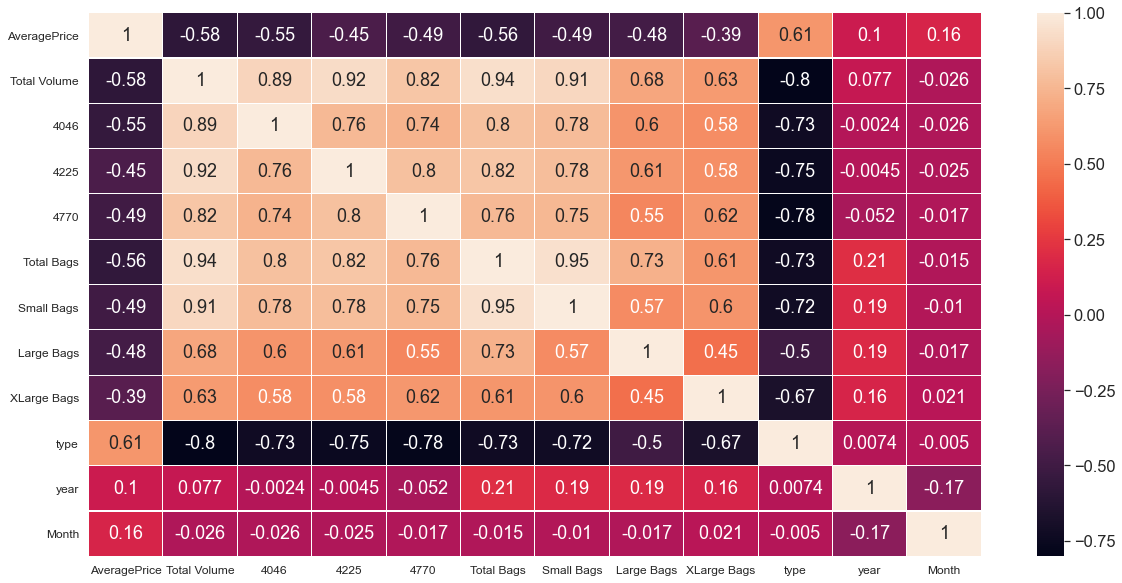

In [116]:
#Plotting heatmap to check the correlation
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),linewidths=.1,annot=True)
plt.yticks(rotation=0,fontsize=12);
plt.xticks(rotation=0,fontsize=12);

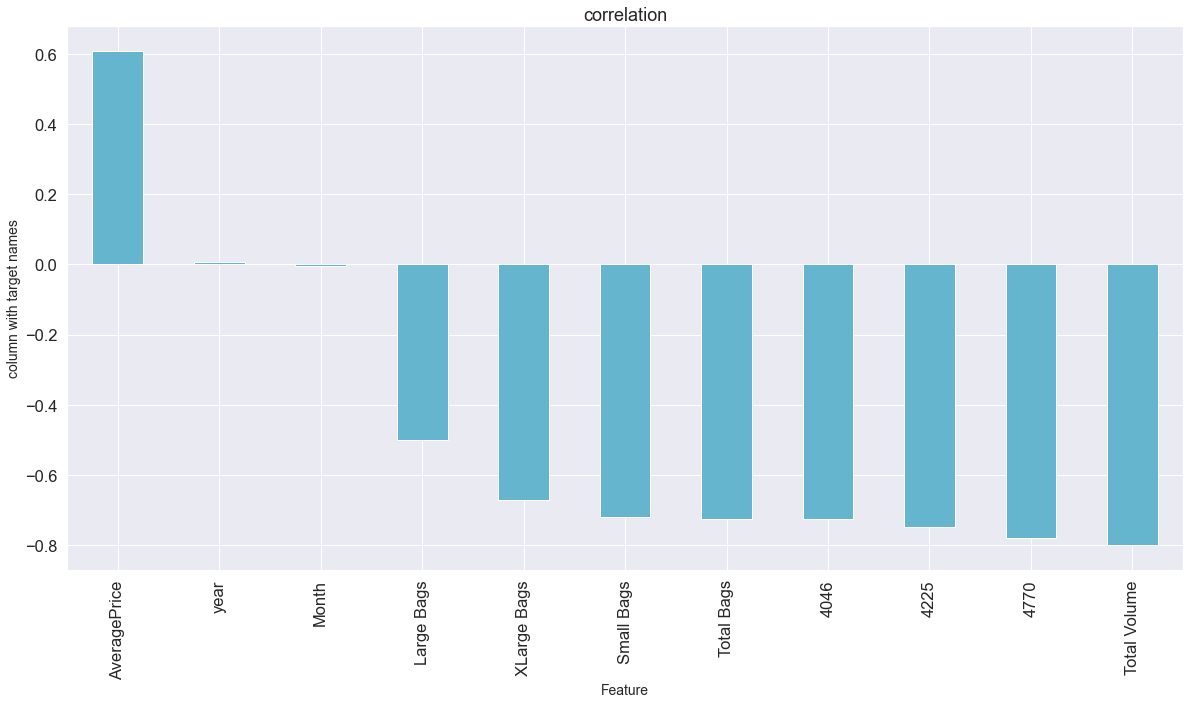

In [117]:
#Plotting bar plot to get better insights on target variable correlation with other columns .
plt.figure(figsize=(20,10))
df_new.corr()['type'].sort_values(ascending=False).drop(['type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

__Observations:__
- Total Bags and Small Bags, Total Volume and Small Bags, Total Volume and Total Bags, Total Volume and 4225 are highly correlated with each other.
- The target variable 'type' is negatively correlated with all the continuous data columns like 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' except the 'Average Price'
- The target variable 'type' is positively correlated with 'Average Price'
- 'Total Volume' is highly negatively correlated with variables 'Total volume' and '4770'

Inferences: The columns that have very less correlation with the target variable like Date and region can be dropped

We have dropped these columns already and created a new dataframe and assigned a variable 'df_new'

# Preprocessing:

In [118]:
#Splitting the data for model training and Assigning variables for the further procedure
x = df_new.drop("type",axis=1)
y = df_new["type"]

# Scaling the data using Standard Scaler:

In [119]:
#importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [120]:
ssc=StandardScaler()
X = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

The data has been scaled using standard scaler.

# Using VIF(Variance Inflation Factor) to remove multicolinearity:

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.988152,AveragePrice
1,51.425087,Total Volume
2,6.812000,4046
3,12.221147,4225
4,3.606767,4770
5,34.555315,Total Bags
6,17.102678,Small Bags
7,3.469570,Large Bags
8,1.866470,XLarge Bags
9,1.531508,year


Since there can be seen high VIF for Total volume, the column shall be dropped and check for VIF again.

In [122]:
#Droping Total Volume column
X = X.drop(["Total Volume"],axis=1)

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.877603,AveragePrice
1,3.524662,4046
2,4.371799,4225
3,3.606748,4770
4,26.523446,Total Bags
5,17.073649,Small Bags
6,3.409203,Large Bags
7,1.865799,XLarge Bags
8,1.530876,year
9,1.127079,Month


After dropping Total volume, Total bags can be seen having high VIF,hence dropping that column.

In [124]:
#Droping Total Bags column
X = X.drop(["Total Bags"],axis=1)

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

,vif_Features,Features
0,1.731374,AveragePrice
1,3.520429,4046
2,4.124141,4225
3,3.606143,4770
4,4.182564,Small Bags
5,2.010526,Large Bags
6,1.863877,XLarge Bags
7,1.464676,year
8,1.116830,Month


This shows the multicolinearity issue has been solved.So we can proceed with model building.

# Finding Best Random State and Accuracy:

In [126]:
from sklearn.neighbors import KNeighborsClassifier as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = KNN()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9947496831111456  on Random_state  18


The best accuracy score is 99.47 on Random_state 18

# Creating train_test split

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=18)

We have created a new train test split using Random State.

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [129]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
predDTC = DTC.predict(X_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.9865042174320525
[[2582   34]
 [  38 2681]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2616
           1       0.99      0.99      0.99      2719

    accuracy                           0.99      5335
   macro avg       0.99      0.99      0.99      5335
weighted avg       0.99      0.99      0.99      5335



We observe that the DTC has accuracy 98.65 %.

# Random Forest Classifier

In [130]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
predRFC = RFC.predict(X_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9943767572633552
[[2609    7]
 [  23 2696]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2616
           1       1.00      0.99      0.99      2719

    accuracy                           0.99      5335
   macro avg       0.99      0.99      0.99      5335
weighted avg       0.99      0.99      0.99      5335



We observe that RFC has accuracy 99.4%.

# KNN Classifier

In [131]:
knn = KNN()
knn.fit(X_train,y_train)
predknn = knn.predict(X_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.9986879100281162
[[2612    4]
 [   3 2716]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2616
           1       1.00      1.00      1.00      2719

    accuracy                           1.00      5335
   macro avg       1.00      1.00      1.00      5335
weighted avg       1.00      1.00      1.00      5335



KNN has accuracy 99.8%

# Support Vector Machine Classifier

In [132]:
svc = SVC()
svc.fit(X_train,y_train)
predsvc = svc.predict(X_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.9921274601686972
[[2602   14]
 [  28 2691]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2616
           1       0.99      0.99      0.99      2719

    accuracy                           0.99      5335
   macro avg       0.99      0.99      0.99      5335
weighted avg       0.99      0.99      0.99      5335



SVC has accuracy 99.2%.

# GradientBoostingClassifier

In [133]:
GB = GradientBoostingClassifier()
GB.fit(X_train,y_train)
predGB = GB.predict(X_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.9874414245548266
[[2597   19]
 [  48 2671]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2616
           1       0.99      0.98      0.99      2719

    accuracy                           0.99      5335
   macro avg       0.99      0.99      0.99      5335
weighted avg       0.99      0.99      0.99      5335



GradientBoostingClassifier has accuracy 98.74%.

# Checking the Cross Validation Score

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
print(cross_val_score(DTC,X,y,cv=5).mean())

0.9590026225636612


In [136]:
print(cross_val_score(RFC,X,y,cv=5).mean())

0.9759863233289261


In [137]:
print(cross_val_score(knn,X,y,cv=5).mean())

0.961646026324303


In [138]:
print(cross_val_score(svc,X,y,cv=5).mean())

0.9754239252564613


In [139]:
print(cross_val_score(GB,X,y,cv=5).mean())

0.9717125217374255


#Observing the difference between the accuracy score and the cross validation score


dtc_score = 98.87 - 95.9 = 3

rfc_score = 99.4 - 97.5 = 2

knn_score = 99.8 - 96.1 = 3.7

svc_score = 99.2 - 97.54 = 1.7

gbc_score = 98.7 - 97.17 = 1.6

From the above we can observe the difference between the accuracy score and cross validation score is least in SVC and Gradient Boosting classifier but SVC has higher accuracy than other classifiers. Hence we can predict that SVC is the best model.

# Hyper parameter tuning

In [140]:
from sklearn.model_selection import GridSearchCV

In [141]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [142]:
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [143]:
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.987 total time=   5.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   5.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.992 total time=   5.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.986 total time=   5.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.988 total time=   6.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.974 total time=   1.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.971 total time=   1.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.976 total time=   1.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.971 total time=   1.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.974 total time=   1.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.959 total time=   2.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.998 total time=   2.9s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=1.000 total time=   2.8s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.997 total time=   2.7s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.997 total time=   2.8s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.997 total time=   0.4s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.995 total time=   0.4s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.998 total time=   0.4s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.996 total time=   0.4s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.996 total time=   0.4s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.994 total time=   0.9s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.991 total time=   0.7s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.996 total time=   0.8s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [144]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [145]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=10, gamma=1)


In [146]:
# Re-runnig predictions to see a classification report on this grid object just like you would with a normal model.
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2616
           1       1.00      1.00      1.00      2719

    accuracy                           1.00      5335
   macro avg       1.00      1.00      1.00      5335
weighted avg       1.00      1.00      1.00      5335



Here the final model gives 100% accuracy.

# Saving the model:

In [147]:
# Saving the final model using .pkl
import joblib
joblib.dump(grid,"Avocado_type.pkl")

['Avocado_type.pkl']

# Predicting using the model

In [148]:
# Loading the saved model
model1=joblib.load("Avocado_type.pkl")

#Prediction
predicted1 = model1.predict(X_test)
predicted1

array([1, 1, 1, ..., 0, 1, 0])

Above are the predicted values.

In [149]:
pd.DataFrame([model1.predict(X_test)[:],y_test[:]],index=["Predicted1","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,5325,5326,5327,5328,5329,5330,5331,5332,5333,5334
Predicted1,1,1,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0
Actual,1,1,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,1,0,1,0


Above table shows predicted and actual values.They look similar which is Expected outcome.